In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs109a_hw0.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 

## Homework 0

**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Natesh Pillai and Pavlos Protopapas

---

## Welcome to CS109a!

CS109A attracts students with diverse backgrounds, interests, and goals. This also means that students' experiences with the course prerequisites are quite varied. Some may, for example, have extensive coding experience, but perhaps can't remember how to represent a projection with linear algebra. Others may have a strong statistics background, but are less confident when it comes to Python.

Homework 0 is a way to assess your comfort with the skills and concepts foundational to the course. It is not expected that you should be able to recall everything from memory while working through the assignment. What maters is the ability to use the context and resources available to fill in any gaps and work toward your goal. This is what we do 'in the real world' after all! However, if you do find HW0 to be too challenging, it is perhaps best to spend more time with the prerequiste material and register for CS109A the next time around.

### [Table of contents](#top)
- **1** [Setting the Stage](#part1)
    - Why Python
    - The Shell & Terminal
    - Virtual Environments & Package Managers
    - Jupyter 
- **2** [Python Poetry Challenge](#part2)
    - File I/O
    - String Parsing
    - Data Structures
    - Functions
    - Classes
- **3** [Math & Statistics](#part3)
    - Partial Derivatives
    - $\LaTeX$
    - Joint & Conditional Probability
    - Random Variables & PDFs

## HW0 User Guide

HW0 is a large document, but there isn't much coding required to complete it.

- If you already know how to create a virtual environment from the provided .yml file then you can jump right to part 2 (though you should read through part 1 eventually).
- The Python content covered in part 2 will start being put to use as soon as Lab1 & HW1
- The math topics in part 3 will begin to make an appearance by HW2

# Part 1: Setting the Stage <a id="part1"></a>

A data scientist's toolkit is a modular collection of various technologies. Taking the time to familiarize yourself with these different components and how they work together will help you be more effective and open new possibilities to you. Students will also be provided with computing environments they can connect to through their web browser that are sufficient for completing all course work. But everyone is expected to be able to create similar environments on computer systems of their own.

Prerequisites for this section include:
- Using a terminal application to run shell commands
- Facility with the [filesystem](https://en.wikipedia.org/wiki/File_system): reading/writing files, navigating the file tree, etc.

## Why Python

Our primary tool in this course is the Python programming language. It has a reputaion for having a clean, readable syntax, sometimes described as being "like pseudocode you can run." Python is also distributed with a large [standard library](https://docs.python.org/3/library/index.html). This "batteries included" approach has made Python one of the most popular general purpose programming languages around today.

As a result, the community of Python users is enormous with many contributing to open source projects. The Python Package Index ([PyPi](https://pypi.org/)) hosts over 385,000 different projects! And that's not all. There are also specialized repositories for scientific computing packages, such as [conda-forge](https://conda-forge.org/#page-top). And then there are all the other public projects hosted on Github, Gitlab, and elsewhere. Python gives us access to this software ecosystem.

## The Shell & Terminal

Most modern operating systems make use of Python, so you likely already have some version installed on your machine!

You can check by querying your [**shell**](https://en.wikipedia.org/wiki/Shell_%28computing%29). The shell is a programming language that gives users access to the operating system's services. An interactive shell runs in a read, evaluate, print, and loop sequence ([REPL](https://en.wikipedia.org/wiki/Read%E2%80%93eval%E2%80%93print_loop)). These days, we interact with the shell through a [terminal emulator](https://en.wikipedia.org/wiki/Terminal_emulator), which we'll simply ([and not quite correctly](https://unix.stackexchange.com/questions/4126/what-is-the-exact-difference-between-a-terminal-a-shell-a-tty-and-a-con)) refer to as the **terminal**.

The terminal is the program that grants you a text interface through which you can enter commands to the interactive shell. 

>**Note:** Windows user have [PowerShell](https://docs.microsoft.com/en-us/powershell/scripting/overview?view=powershell-7.2), but it lacks many useful commands. This will work for the course, but please consider trying out [Git Bash](), or better still, [Windows Subsystem for Linux]() (WSL) for a true [UNIX shell](https://en.wikipedia.org/wiki/Unix_shell) experience!

### Checking for Python on Your System

Let's put a (UNIX) shell command to use. PowerShell users should try the similar [Get-Command](https://www.delftstack.com/howto/powershell/equivalent-of-which-command-in-powershell/).

The `which` command returns the pathnames of the files (or [links](https://en.wikipedia.org/wiki/Symbolic_link)) which would be executed in the current [environment](https://www.tutorialspoint.com/unix/unix-environment.htm), had its arguments been given as commands in the shell. It does  this by searching the [PATH](https://en.wikipedia.org/wiki/PATH_(variable)) environmental variable for executable files matching the names of the arguments.

```sh
which python
```

You'll be shown a path like `/usr/bin/python`.

If it was found you can envoke `python` and ask for its version.

```shell
python --version
```

>💡 You can also run shell commands from within Jupyter by prepending a `!`

In [2]:
# !command sends command to the shell that launched Jupyter
!python --version

Python 3.10.6


You should see some version >= 3.8

>**Note:** If your call to `which` threw an error saying it couldn't find `python`, or if your version is < 3.8, then you're going to need to install Python. Don't worry. The [installation steps](#Micromamba) in the next section will take care of this.

Now you can use Python's *own* interactive shell, or "[REPL](https://pythonprogramminglanguage.com/repl/)," in the terminal by envoking `python`.
You'll have access to modules from the standard Python library like `datetime`, `math`, `collections`, `itertools`, `re`, etc. But we'd also like to install 3rd party packages.

⚠️ However, we need to take care in how we install packages because:
1. Some of your coding projects will require conflicting versions of the same package that can't coexist.
2. If your operating system makes use of Python, altering the system installation could have unintended consequences.
3. We can't hope to make our results reproducible without documenting the specific software versions that produced them.

What we need is some way to easily create and manage multiple isolated Python installations, each with their own set of package dependencies.

## Virtual Environments & Package Managers

![Keep your Python's isolated from one another!](img/python_island_dalle2.png "Python Island by MINIDALL-E 2")

A [virtual environment](https://docs.python.org/3/library/venv.html#venv-def) is a self-contained directory tree that contains a Python installation for a particular version of Python, plus a number of additional packages. Just what we're looking for!

Most Python distributions will include:
* [venv](https://docs.python.org/3/library/venv.html#module-venv) - to create and manage virtual environments
* [pip](https://docs.python.org/3/installing/index.html#installing-index) - to download and manage 3rd party packages (from PyPi by default)

For more information on these tools, you can read the Python tutorial entry on [virtual environments & packages](https://docs.python.org/3/tutorial/venv.html?highlight=pip)

But we can generalize this idea of a Python virtual environment to *all languages*. This is useful because our data science projects may have dependencies outside of Python itself.

### Conda - Language Agnostic Environments

[**Conda**](https://conda.io/en/latest/index.html) provides cross-platform package, dependency, and environment management for any language—Python, R, Ruby, Lua, Scala, Java, JavaScript, C/ C++, etc.

You *could* get conda by installing [Anaconda](https://www.anaconda.com/), a Python distribution that includes conda and many other packages, but it is very large any many of the packages you likely won't use. A better option might be [miniconda](https://docs.conda.io/en/latest/miniconda.html), a more minimal distribution that includes Python, pip, conda, and a few other useful packages.

**But conda can be slow...** 🐢

Conda is written in Python and its [dependency resolution](https://www.activestate.com/resources/quick-reads/python-dependencies-everything-you-need-to-know/) method can be rather slow. The [Mamba](https://mamba.readthedocs.io/en/latest/index.html) project is a reimplementation of the conda package manager in C++. It resolves dependencies much faster, makes use of multi-threading for parallel package downloading, and uses an almost identical command syntax to conda, so switching over if you're used to conda should be easy.

For these reasons *we recommend using some version of **mamba** over conda*. And the easiest way to get mamba on your system is through `micromamba`.

### Micromamba - Package & Environment Manager Installation

Micromamba is a single executable we can use to bootstrap conda environments on Linux, macOS, or Windows. It will even install the desired version of Python for your environment. Consult the [documentation](https://mamba.readthedocs.io/en/latest/installation.html#micromamba) for up-to-date installation instructions on your OS. 

In the final step of the installation, micromamba will alter your shell's configuration file so that that both the `micromamba` executable and the directory used to store your virtual environments are added to your PATH.

We're now ready to create an environment for CS109A!

#### Creating an Environment


We've provided a `cs109a.yml` file that lists the packages we'll be using in the course. It should be in the same directory as this notebook.\
Go ahead and take a peek! it's just a plain text file. [YMAL](https://yaml.org/) (sometimes abrevieated 'YML') is a "human-friendly" [data serialization](https://docs.python-guide.org/scenarios/serialization/) language commonly used in configuration files with a minimal syntax.

We can instruct micromamba to create a new environment from our yml specification:

``` sh
micromamba create -f cs109a.yml
```

#### Activating an Environment

Once all the packages have been installed, we can activate our new environment:

```sh
micromamba activate cs109a
```

You'll see your shell prompt now shows your active environment. You can use `deactivate` to turn it off.

## Jupyter

Much of the course material, lecture supplementals, labs, exercises, assignments, etc., will be in the form of [Jupyter Notebooks](https://jupyter.org/). They allow for the embedding runnable code in a document of formatted text. For more about this general approach, take a look at the [literate programming](https://en.wikipedia.org/wiki/Literate_programming) paradigm.

If you created your environment with the CS109A yml file above you will already have the Jupyter Lab package installeed. It will allow us to interact with the document. To explore the Jupyter Lab interface, you can look at their [tutorial](https://jupyter.org/try-jupyter/lab/) & [documentation](https://jupyterlab.readthedocs.io/en/stable/user/interface.html). 

You can launch Jupyter from your terminal with:
```sh
jupyter lab
```
The output in the terminal will display an address you can paste into your browser to access the now running Jupyter Lab server, but it should open in your default broswer automatically.

>💡 You can edit your shell's config file to make interacting with these tools more comfy. A few ideas:
>- alias mm="micromamba" # shorten micromamba command
>- alias 109="micromamba activate cs109a" # fast activate
>- 109 # activate cs109a environment for every new terminal (requires previous alias)
>- alias jl="jupyter lab" # fast lab

<div class='exercise'> <b>Q1 - Check your installation </b></div>

You should now have access to all the packages listed in the cs109a.yml file.

In [3]:
# See the "import ... as ..." contructs below: 
# they're aliases/shortcuts for the package names. As a result, 
# we can call methods such as plt.plot() instead of matplotlib.pyplot.plot()
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
grader.check("q1")

q1 results: All test cases passed!

# Part 2: Python Poetry Challenge<a id="part2"></a>

CS109A assumes students are already familiar with the basics of Python programming. 

To assess your level of Python preparedness, you'll be creating a **random poem generator** from a collection of [Emily Dickinson](https://en.wikipedia.org/wiki/Emily_Dickinson) poems made available through [Project Gutemberg](https://www.gutenberg.org/).

Core Python skills utilized to completing this challenge include:

* File I/O
* Data structures
  - strings
  - lists & slicing
  - dictionaries
* Logical operators
* Iteration
* Functions
* Classes
* Debugging
* Reading documentation
* Interpretting code

<div class='exercise'><b>Q2.1 - Read in the file</b></div>

The document we'll be working with is a digital transcription assembling [three early Emily Dickinson poetry collections](https://www.gutenberg.org/ebooks/12242) for which the U.S. copyright has expired. 

We've included this document with HW0 as a plain text file. The filename is`pg12242.txt` and it's located in the `data` subdirectory.

Read the contents of `pg12242.txt` into a variabled named `text`. The arcane file name is a stipulation of [The Project Gutenberg License](https://gutenberg.org/policy/license.html) included in the file.

Take the contents of the file and save the substring containing the first 10,000 characters as the variable `head` and the substring containing the final 25,000 characters as `tail`.

In [5]:
with open(r'/mnt/c/Users/sykri/OneDrive/CSCI E-109A/cs109a_hw0/data/pg12242.txt') as f:
    text = f.read()
    print(len(text))

head = text[:10000]
tail = text[-25000:]

f.close()

197438


In [6]:
# We can inspect the beginning of the content
print(head)

﻿Project Gutenberg's Poems: Three Series, Complete, by Emily Dickinson

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Poems: Three Series, Complete

Author: Emily Dickinson

Release Date: May 3, 2004 [EBook #12242]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK POEMS: THREE SERIES, COMPLETE ***




Produced by Jim Tinsley <jtinsley@pobox.com>





POEMS

by EMILY DICKINSON




Edited by two of her friends

MABEL LOOMIS TODD and T.W. HIGGINSON




PREFACE.

The verses of Emily Dickinson belong emphatically to what Emerson
long since called "the Poetry of the Portfolio,"--something produced
absolutely without the thought of publication, and solely by way of
expression of the writer's own mind. Such verse must inevitably
forfeit whatever advantage lies in the disci

In [7]:
# final 25,000 characters 
print(tail)

els say, on yesterday,
  Just as the dawn was red,
One little boat o'erspent with gales
Retrimmed its masts, redecked its sails
  Exultant, onward sped!





XLVIII.

There's been a death in the opposite house
  As lately as to-day.
I know it by the numb look
  Such houses have alway.

The neighbors rustle in and out,
  The doctor drives away.
A window opens like a pod,
  Abrupt, mechanically;

Somebody flings a mattress out, --
  The children hurry by;
They wonder if It died on that, --
  I used to when a boy.

The minister goes stiffly in
  As if the house were his,
And he owned all the mourners now,
  And little boys besides;

And then the milliner, and the man
  Of the appalling trade,
To take the measure of the house.
  There'll be that dark parade

Of tassels and of coaches soon;
  It's easy as a sign, --
The intuition of the news
  In just a country town.





XLIX.

We never know we go, -- when we are going
  We jest and shut the door;
Fate following behind us bolts it,
  And w

In [8]:
# entire contents
print(text)

﻿Project Gutenberg's Poems: Three Series, Complete, by Emily Dickinson

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Poems: Three Series, Complete

Author: Emily Dickinson

Release Date: May 3, 2004 [EBook #12242]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK POEMS: THREE SERIES, COMPLETE ***




Produced by Jim Tinsley <jtinsley@pobox.com>





POEMS

by EMILY DICKINSON




Edited by two of her friends

MABEL LOOMIS TODD and T.W. HIGGINSON




PREFACE.

The verses of Emily Dickinson belong emphatically to what Emerson
long since called "the Poetry of the Portfolio,"--something produced
absolutely without the thought of publication, and solely by way of
expression of the writer's own mind. Such verse must inevitably
forfeit whatever advantage lies in the disci

In [9]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<div class='exercise'><b>Q2.2 - Remove non-poem content</b></div>

Keeping in mind that this is a compilation of three publications (or 'series') and inspecting the `head` and `tail` sections of the text we printed above, we can identify some useful structure in the document:  

- Project Gutenberg: Header - Metadata
- Series 1: Preface
- **Series 1: Poems**
- Series 2: Preface
- **Series 2: Poems**
- Series 3: Preface
- **Series 3: Poems**
- Project Gutenberg: Footer - License 

Recognizing and making use of structure is a large part of data science.

Create three variables, `series1`, `series2`, and `series3`, each consiting of one of the 3 sections of `text` dedicated to the poem content, *exluding* prefaces and the Project Gutenberg metadata and license. Be sure to [strip](https://docs.python.org/3/library/stdtypes.html?highlight=strip#str.strip) any trailing or leading whitespace from the final strings. 

>**Hints:**
>- Each preface section begins with "POEMS\n"
>- Each poem section after a preface starts with a numbered subsection beginning with "I."
>- The Project Gutenberg License section begins with "End of Project Gutenberg"
>- You may import standard library modules such as [re](https://docs.python.org/3/library/re.html) to help here, but this task can also be done using only Python built-ins with no additional imports.
>- Review [indexing and slicing](https://codesolid.com/python-indexing-slicing-exercises/) if needed
>- The string `.index()` method returns the index of the first occurance of a target string in a source string.

In [10]:
series_list = text[(text.index('POEMS\n')):].split("POEMS\n")
print(len(series_list))
poems = []
for series in series_list[1:]:
    if "End of Project Gutenberg" in series:
        s = series[(series.index("I.")):(series.index("End of Project Gutenberg"))]
    else:
        s = series[(series.index("I.")):]
    poems.append(s)

[poem.strip() for poem in poems]
    
[print(len(poem)) for poem in poems]
# for p in poems:
#     print("START", p[:1000])

4
42501
67095
52505


[None, None, None]

In [11]:
series1 = poems[0].strip()
series2 = poems[1].strip()
series3 = poems[2].strip()

In [12]:
grader.check("q2.2")

q2.2 results: All test cases passed!

We will then join the three series into a single string using `join`. For the delimiter we use six newline characters. The reason for this choice will soon become clear.

In [13]:
# join series into single string connected by "\n\n\n\n\n\n"
poems_text = ('\n'*6).join([series1.strip(),
                            series2.strip(),
                            series3.strip()])

And we can check to see that we only have the poem content.

In [14]:
print(poems_text[:445])
print('\n---\n')
print(poems_text[-275:])

I. LIFE.


I.

SUCCESS.

[Published in "A Masque of Poets"
at the request of "H.H.," the author's
fellow-townswoman and friend.]

Success is counted sweetest
By those who ne'er succeed.
To comprehend a nectar
Requires sorest need.

Not one of all the purple host
Who took the flag to-day
Can tell the definition,
So clear, of victory,

As he, defeated, dying,
On whose forbidden ear
The distant strains of triumph
Break, agonized and clear!






---




LIX.

ETERNITY.

On this wondrous sea,
Sailing silently,
  Ho! pilot, ho!
Knowest thou the shore
Where no breakers roar,
  Where the storm is o'er?

In the silent west
Many sails at rest,
  Their anchors fast;
Thither I pilot thee, --
Land, ho! Eternity!
  Ashore at last!


<div class='exercise'><b>Q2.3 - Remove annotation</b></div>

The first poem contains some editor annotation in square brackets.

In [15]:
print(poems_text[:200], '...')

I. LIFE.


I.

SUCCESS.

[Published in "A Masque of Poets"
at the request of "H.H.," the author's
fellow-townswoman and friend.]

Success is counted sweetest
By those who ne'er succeed.
To comprehend  ...


This is the only annotation like this in the text. You can see that these are the only two square brackets that appear in the string.

In [16]:
# Confirm that brackets occur only once
assert (poems_text.count("[") == 1) and (poems_text.count("]") == 1)

Create `poems_text_clean` which has this annotation (and the additional blank line below it) removed.

**Hints:** The string method [`split`](https://docs.python.org/3/library/stdtypes.html?highlight=split#str.split) could be put to use here



In [17]:
import re

poem_list = re.split('\[|\]\n', poems_text)
# print(len(poem_list))
# print(poem_list)

poems_text_clean = ('\n'*2).join([poem_list[0].strip(), poem_list[2].strip()])
# print(poems_text_clean)

In [18]:
print(poems_text_clean[:100], '...')

I. LIFE.


I.

SUCCESS.

Success is counted sweetest
By those who ne'er succeed.
To comprehend a nec ...


In [19]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<div class='exercise'><b>Q2.4 - Identify sections and numbering</b></div>

Now let's remove some of the other content that was *not* the work of the original author: the section titles and poem numbers. It is helpful to notice that all such lines begin with [roman numerals](https://en.wikipedia.org/wiki/Roman_numerals).

Implement the `startswith_rn` function which we can use to identify lines that serve as section titles or poem numbering.

>**Note:** The function does not need to be sophisticated enough to reject 'invalid' roman numerals such as 'IIIV.' We are assuming (correctly) that these sorts of strings do not occur and so the function only needs to be powerful enough to recognize those numerals that do occur at the start of headers in the text while excluding the titles and the content of any of the poems.

In [20]:
import re

def startswith_rn(s: str) -> bool:
    '''
    Returns: True if `s` starts with a roman numeral and False otherwise
    Ex: 
        startswith_rn("III. NATURE.") -> True
        startswith_rn("I'm nobody! Who are you?") -> False
        
    Roman numeral chars I, V, X, L, C, D, and M
    '''
    # Searching the start of string in expression and returning boolean value
    if not bool(re.search(r"^(I|V|X|L|C|D|M)",s) and s[-1] == "."):
        return False
    
    return True

# # Test
# testcases = ["I.", "III. NATURE.", "VIX.", " ", "I'm nobody! Who are you?"]

# for t in testcases:
#     print(t, startswith_rn(t))

In [21]:
grader.check("q2.4")

q2.4 results: All test cases passed!

<div class='exercise'><b>Q2.5 - Remove sections and numbering</b></div>

Use your new `startswith_rn` function to help you remove the lines starting with roman numerals from `poems_text_clean`. Strip any whitespace from the ends of the final result and store the string in the variable `poems_text_nonum`

In [22]:
poems_text_nonum = ''

for line in poems_text_clean.splitlines():
    if not startswith_rn(line):
        poems_text_nonum = poems_text_nonum + line + "\n"
    
poems_text_nonum = poems_text_nonum.strip()

In [23]:
print(poems_text_nonum[:500])

SUCCESS.

Success is counted sweetest
By those who ne'er succeed.
To comprehend a nectar
Requires sorest need.

Not one of all the purple host
Who took the flag to-day
Can tell the definition,
So clear, of victory,

As he, defeated, dying,
On whose forbidden ear
The distant strains of triumph
Break, agonized and clear!






Our share of night to bear,
Our share of morning,
Our blank in bliss to fill,
Our blank in scorning.

Here a star, and there a star,
Some lose their way.
Here a mist, and th


In [24]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<div class='exercise'><b>Q2.6 - Create a list of poems</b></div>

Next, we'd like to split the text up into a list of poems.

To investigate how we might do this it is important to view all the charcters in the text. The `pprint` function from the standard library allows us to display the text with the newline characters '\n' while also making the output easier to read by including the line breaks as well.

In [25]:
from pprint import pprint

In [26]:
pprint(poems_text_nonum[:2000])

('SUCCESS.\n'
 '\n'
 'Success is counted sweetest\n'
 "By those who ne'er succeed.\n"
 'To comprehend a nectar\n'
 'Requires sorest need.\n'
 '\n'
 'Not one of all the purple host\n'
 'Who took the flag to-day\n'
 'Can tell the definition,\n'
 'So clear, of victory,\n'
 '\n'
 'As he, defeated, dying,\n'
 'On whose forbidden ear\n'
 'The distant strains of triumph\n'
 'Break, agonized and clear!\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 'Our share of night to bear,\n'
 'Our share of morning,\n'
 'Our blank in bliss to fill,\n'
 'Our blank in scorning.\n'
 '\n'
 'Here a star, and there a star,\n'
 'Some lose their way.\n'
 'Here a mist, and there a mist,\n'
 'Afterwards -- day!\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 'ROUGE ET NOIR.\n'
 '\n'
 'Soul, wilt thou toss again?\n'
 'By just such a hazard\n'
 'Hundreds have lost, indeed,\n'
 'But tens have won an all.\n'
 '\n'
 "Angels' breathless ballot\n"
 'Lingers to record thee;\n'
 'Imps in eager caucus\n'
 'Raffle for my soul.\n'
 '\n'
 '\n'

Notice how the poems are separated by multiple newline characters. Further exploration shows the minimum number of newlines between poems to be *6*.

Use this information to create `poem_list` where the elements of the list are the poems in the order they occur in `poems_text_nonum`. For now, we will include the title if the editors provided one as part of the poem. Each poem should be stripped of leading and trailing whitespace. 

>**Hint:** Be sure to exclude any empty strings elements from your final `poem_list`.

In [66]:
poem_list = poems_text_nonum.split("\n\n\n\n\n\n")
poem_list = [poem.strip() for poem in poem_list]
# poem_list = list(filter('', poem_list))

In [67]:
temp_list = []
for i, poem in enumerate(poem_list):
    if poem != '':
        temp_list.append(poem)

poem_list = temp_list

In [68]:
print(f"There are a total of {len(poem_list)} poems.")

There are a total of 445 poems.


In [69]:
grader.check("q2.6")

q2.6 results: All test cases passed!

<div class='exercise'><b>Q2.7 - Create a poem dictionary</b></div>

We now have all the poems separated, but we might want some means of accessing specific poems without having to remember their arbitrary position in the list. This is where the key-value pair structure of dictionaries will help.

We will create a dictionary, `d`, where the keys are the poem titles and the values are the poems themselves.

If the editors did not provide a title, we'll use the first line of the poem as the key.

Recall that some poems were given identical titles. And we know dictionary keys must be unique. Our approach will be to use incrementing numerical labels to denote poems with duplicate names beyond the first encountered. The titles should then look like: "ETERNITY.", "ETERNITY. (2)", "ETERNITY. (3)", etc.

We have provided one possible implementation that is nearly complete. Only one line needs to be filled in.

You are also welcome to create your own solution from scratch.

In [70]:
# helper functions
# Answers: what number should I increment to having now seen a duplicate?
next_title_num = lambda x: x[-2] + 1 if x[-2].isnumeric() else 2 
# Answers: what was the number of the previous poem with this title?
prev_title = lambda d, k: sorted([k for k in d.keys() if k.startswith(k)])[-1]

def update(d: dict, k: str, v: str) -> None:
    '''
    Adds key-value pair 'k' & 'v' to dictionary 'd'
    Uses helper functions to increment key string if key already exists
    Dictionary is changed inplace; Returns None.
    '''
    if d.get(k):
        k = f'{k} ({next_title_num(prev_title(d,k))})'
    d[k] = v  

In [85]:
is_editor_title = lambda x: x.endswith('.') and x.isupper()
has_editor_title = lambda x: is_editor_title(x.split('\n')[0]) # check 1st line for editor title

d = {}
for p in poem_list:
    # first line will always be the key 
    k = p[:p.index('\n')]
    # print(k)
    if has_editor_title(p):
    #     find string that should be the value (poem minus title)
    #     YOUR CODE HERE
        p = p[p.index('\n'):].strip()
    
    v = p.strip()
    
    # print(k, ':', v, "\n END------END")
    # add new new pair to dictionary
    # update function handles altering the key if neccessary
    # (i.e., incrementing the numerical suffix of the title)
    update(d, k, v)

In [86]:
print(d['HOPE.'])

Hope is the thing with feathers
That perches in the soul,
And sings the tune without the words,
And never stops at all,

And sweetest in the gale is heard;
And sore must be the storm
That could abash the little bird
That kept so many warm.

I 've heard it in the chillest land,
And on the strangest sea;
Yet, never, in extremity,


In [87]:
grader.check("q2.7")

q2.7 results: All test cases passed!

<div class='exercise'><b>Q2.8 - Most frequent long words</b></div>

We can also ask statistical questions of the data such as, "what are the most common words?"

Find the 10 most frequently used words longer than 10 characters. Ignore case and any punctuation at the end of the word when counting. Consider only the poem text and not the editor provided titles. Store the top 10 words in a list called `top_words` in order of decreasing frequency.

You may find the `punc` variable below useful. It is the set of the punctuation characters occurring at the end of word in the text. You can assume that no words end with multiple punctuation characters.

In [99]:
# punctuation characters to remove when counting words
punc = {w[-1] for p in d.values() for w in p.lower().split() if not w[-1].isalpha()}
punc

{'!', '"', "'", ')', '*', ',', '-', '.', ':', ';', '?', '_'}

In [129]:
# intiialize word dictionary {word: # occurrence} key-value pair
word_dict = {}
words = []

for key, poem in d.items():
    for w in poem.lower().split():
        # remove punctuation at end of word
        if not w[-1].isalpha():
            w = w[:-1]
        # only choose 10 char-long words
        if len(w) >= 10:            
            # increment value if already in
            if (w in word_dict):
                word_dict[w] += 1
            # update word_dict with word
            else:
                word_dict[w] = 1

In [131]:
# print(word_dict)

In [132]:
top_words = sorted(word_dict, key=word_dict.get, reverse=True)[:10]

In [133]:
for w in top_words:
    print(w, word_dict[w])

immortality 10
everlasting 10
butterflies 9
everywhere 8
themselves 6
superfluous 5
revelations 4
everything 4
countenance 4
difference 4


In [134]:
top_words

['immortality',
 'everlasting',
 'butterflies',
 'everywhere',
 'themselves',
 'superfluous',
 'revelations',
 'everything',
 'countenance',
 'difference']

In [135]:
grader.check("q2.8")

q2.8 results: All test cases passed!

<div class='exercise'><b>Q2.9 - Random Poem Generator</b></div>

We're now ready to create our random poem generator.

Complete the `PoetryCollection` class below by defining a [\_\_init__](https://www.geeksforgeeks.org/__init__-in-python/) method. It should take the author's full name and your poem dictionary as arguments and define the class attributes `author`, `collection`, and `size` as described in the docstring.

Then instantiate a `PoetryCollection` using our Emily Dickinson data and call it `poems`. 

In [136]:
class PoetryCollection():
    """
    Attributes
    ----------
    author : str
        full name of author
    collection : dict
        dictionary of (title, poem) key-value pairs
    size : int
        number of poems in collection
    
    Methods
    -------
    random_poem(seed: int = None) -> str
        returns random poem; use seed for reproducibility (default seed=None)
    """
    def __init__(self, author, collection):
        self.author = author
        self.collection = collection
        self.size = len(collection)
    
    def random_poem(self, seed : int = None) -> str:
        rng = np.random.default_rng(seed) 
        return str(rng.choice(list(self.collection.values())))

In [137]:
poems = PoetryCollection("Emily Dickinson", d)

In [138]:
print('Author:', poems.author)

Author: Emily Dickinson


In [139]:
print('Number of poems in collection:', poems.size)

Number of poems in collection: 445


In [140]:
print(poems.random_poem(seed=109))

The only ghost I ever saw
Was dressed in mechlin, -- so;
He wore no sandal on his foot,
And stepped like flakes of snow.
His gait was soundless, like the bird,
But rapid, like the roe;
His fashions quaint, mosaic,
Or, haply, mistletoe.

His conversation seldom,
His laughter like the breeze
That dies away in dimples
Among the pensive trees.
Our interview was transient,--
Of me, himself was shy;
And God forbid I look behind
Since that appalling day!


In [141]:
grader.check("q2.9")

q2.9 results: All test cases passed!

# Part 3 - Math & Statistics <a id="part3"></a>

### Linear Algebra

In data science we frequently encounter problems that can be represented (or approximated) by a [system of linear equations](https://en.wikipedia.org/wiki/System_of_linear_equations).

In this toy example, you've started to collect data about some books in your collection:

| Title                        | New/Cover Price (\$) | Years Since Publication | Has Underlining (Yes/No)| Used Price (\$)|
| :--------------------------- | :---------- | :---------------------- | :-------------- | :--------- |
| Perceptrons (Expanded)       | 35          | 35                      | 1               | 15         |
| Social Empiricism            | 20          | 21                      | 0               | 11         |
| Philosophical Investigations | 42          | 13                      | 1               | 27         |

`Has Underlining` is $1$ if the book is marked up with notes and $0$ otherwise.

We will (naïvely) assume that a book's used price is a [linear combination](https://en.wikipedia.org/wiki/Linear_combination) of the three recorded features which capture information about the book's original price, age, and condition.

That is, there exist coefficients $\beta_1$, $\beta_2$, and $\beta_3$ such that:
$$
\beta_1 \cdot \text{new price} + \beta_2 \cdot \text{years since publication} + \beta_3 \cdot \text{has underlining} = \text{used price}
$$

If you knew the coefficient values then these three features could be used to *predict* the used price of a book for which that data is unavailable, or perhaps to check if a newly observed used price is fair.

If we represent the set of unknown coeffients as a column vector
$$\beta = 
\left[
\begin{array}{cc}
\beta_1 \\
\beta_2 \\
\beta_3 \\
\end{array}
\right]
$$

and represent the three features of our books as a matrix, $X$, and the used prices as a column vector, $y$
$$
X = 
\left[
\begin{array}{cc}
35 & 35 & 1 \\
20 & 21 & 0 \\
42 & 13 & 1 \\
\end{array}
\right]
%
%
y =
\left[
\begin{array}{cc}
15 \\
11 \\
27 \\
\end{array}
\right]
$$

then we can calculate the linear combinations for all rows in $X$ with a single matrix multiplication:
$$X\beta = y$$

Or, written out with the full matrices and vectors:
$$
\left[
\begin{array}{cc}
35 & 35 & 1 \\
20 & 21 & 0 \\
42 & 13 & 1 \\
\end{array}
\right]
%
\left[
\begin{array}{cc}
\beta_1 \\
\beta_2 \\
\beta_3 \\
\end{array}
\right]
%
=
\left[
\begin{array}{cc}
15 \\
11 \\
27 \\
\end{array}
\right]
$$

<div class='exercise'><b>Q3.1 - Arrays & Matrices with Numpy</b></div>

Use [Numpy's](https://numpy.org/) ndarray constructor, `np.array()` to create the $X$ matrix and $y$ column vector as shown above. It is common to pass the constructor a list or list-of-lists as an argument. Don't be afraid to [check the documentation](https://numpy.org/doc/stable/reference/generated/numpy.array.html).
>**Hint:** Remember, $y$ is a *column* vector. You can check the dimensions of an ndarray with the `.shape` attribute. $y$'s shape should be `(3,1)`. The array's `.reshape()` method is one way to address this. When in doubt, a quick internet search will often turn up [Stack Overflow answers](https://stackoverflow.com/questions/50157369/is-there-a-way-to-create-column-vectors-in-numpy-without-having-to-create-a-list) to similar questions.

In [167]:
X = np.array([35,35,1,20,21,0,42,13,1]).reshape((3,3))
y = np.array([15,11,27]).reshape((3,1))

X.shape, y.shape

((3, 3), (3, 1))

In [168]:
X, y

(array([[35, 35,  1],
        [20, 21,  0],
        [42, 13,  1]]),
 array([[15],
        [11],
        [27]]))

In [169]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<div class='exercise'><b>Q3.2 - Matrix inverse</b></div>

We'd like to solve for $\beta$ algebraically and we are in luck! Because our $X$ matrix is square and full rank we can take its [inverse](https://en.wikipedia.org/wiki/Invertible_matrix), denoted $X^{-1}$.

A matrix multiplied by its inverse is the identity matrix of the same shape: $A_{n,n}^{-1}A_{n,n} = \mathit{I}_{n,n}$

And of course, multipling a vector or matrix by the [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix) leaves it unchanged (provided the shapes allow for a valid matrix multiplication): $\mathit{I}A = A$

This is all we need to solve for $\beta$. Just multiply both sides of the equation by $X^{-1}$ on the left and simplify:

$$
\begin{split}
X\beta &= y\\
X^{-1}X\beta &= X^{-1}y\\
\mathit{I}\beta &= X^{-1}y\\
\beta &= X^{-1}y
\end{split}
$$


With the information presented above, use Numpy to find $\beta$ and store it in `beta`.
>**Hints:** Numpy has a `linalg` sub-module containing many useful functions related to linear algebra. You'll need (1) a method to take the inverse of a matrix and (2) a means of calculating a matrix product. The [documention](https://numpy.org/doc/stable/reference/routines.linalg.html) is very thorough.

In [229]:
from numpy import linalg

In [230]:
# linalg.inv(X)

In [248]:
beta = linalg.inv(X).dot(y)
# beta = np.dot(linalg.inv(X), y)

In [249]:
# display resulting betas
beta

array([[ 0.84156729],
       [-0.27768313],
       [-4.73594549]])

In [250]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<div class='exercise'><b>Q3.3 - Making a prediction</b></div>

Now let's use your $\beta$ vector to predict the used price of a book not in our original data.

| Title                        | New/Cover Price | Years Since Publication | Has Underlining | Used Price |
| :--------------------------- | :---------- | :---------------------- | :-------------- | :--------- |
| Linear Algebra Done Right    | 44          | 7                      | 0               | ?         |

Create the ndarray `new_box` to represent the three feature values of the book.\
Then multiple it by `beta` and store the results in `pred_price`.

In [265]:
new_book = np.array([44, 7, 0]).reshape((1,3))
# pred_price = np.matmul(beta, new_book)
pred_price = (np.dot(new_book, beta))[0]

In [266]:
print(f'Predicted Price: ${pred_price[0]:.2f}|')

Predicted Price: $35.09|


In [267]:
grader.check("q3.3")

q3.3 results: All test cases passed!

We will almost never be so lucky as to be working with a square data matrix in a problem like this. And our assumption that used prices *are indeed* linear combinations of the feature values, with no variation, is far to strong. In the course we will see ways of relaxing both these assumptions.

### Multivariate Calculus

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.4 - Partial Derivatives for Optimization</b></div>

Calculus is a powerful tool for optimization. For example, imagine we have a "loss" or "cost" function, $f(x,y)$, where $x$ and $y$ are parameters we can control. The goal is to find the values of $x$ and $y$ that minimize $f$.
$$
\arg \min_{x,y} f(x,y)
$$
We know that a function's derivative is zero at extrema (provided it is differentiable there). Taking the partial derivatives of $f$ with respect to each of the parameters, setting them equal to zero, and solving for the respective parameter values can then provide us with potential minima. We can confirm that a set of parameter values correspond to a minima if we can also show that the 2nd derivatives evaluated at those values are all $> 0$ (again, provided the original function is twice differentiable there).

Your goal is to use this strategy to find the $x$ and $y$ that minimize the loss function:
$$
f(x,y) = xy + (y+1)^2 + 2x^2 + 4
$$

You can also do this using the gradient operator, $\nabla\cdot$

One of the main benifits of working with jupyter notebooks is the ability to display nicely formatted mathematical notation. Use $\LaTeX$ in a markdown cell(s) below to show your work. Then store the $x$ and $y$ values you find that minimize $f$ in the variables `x_min` and `y_min` respectively.

_Type your answer here, replacing this text._

In [283]:
def f(x, y):
    # print("x*y =", x*y)
    # print("(y + 1)**2 =", (y + 1)**2)
    # print("2*(x**2)", 2*(x**2))
    return ((x*y) + (y + 1)**2 + 2*(x**2) + 4)

# print(f(0,0))

5


In [ ]:
x_min = ...
y_min = ...

In [ ]:
grader.check("q3.4")

<!-- END QUESTION -->

### Probability & Statistics

As we move through the course we will look at a probabalistic method for modeling data. There, we assume that the value of interest, $y$, for each observation, $x$, is a [random variables](https://en.wikipedia.org/wiki/Random_variable) described by a specific family of [probability distributions](https://en.wikipedia.org/wiki/Probability_distribution) (e.g., Gaussian, binomal, etc.), and that the parameter(s) of these distributions, such as the mean, is related to the values in $x$. We then try and learn what this relationship is.

But before we get there we should remind ourselves about how to work with probabilities.

<div class='exercise'><b>Q3.5 - Joint probabilities</b></div>

First, let's think about the joint probability of several [i.i.d.](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) random variables.

What is the probability of rolling three 3's in a row with a fair 6-sided die?\
Save the result in `dice_prob`.

In [284]:
dice_prob = 1/6**3
dice_prob

0.004629629629629629

In [285]:
grader.check("q3.5")

q3.5 results: All test cases passed!

<div class='exercise'><b>Q3.6 - A 'branching' example</b></div>

Here's a slightly more involved scenario:\
In your pocket you have two coins: a **fair coin** and a **biased coin** that is twice as likely to land heads than tails. 

You take a coin from your pocket at random and flip it 4 times. You see:\
$$H,T,H,T$$

Given that you were equally likely to choose either coin, what was the probability of this series of outcomes?\
Save your result in `coin_prob`.

In [292]:
# biased_coin = p(heads) = 0.666, p(tails) = 0.333
# fair_coin = p(heads) = 0.5, p(tails) = 0.5
# p(f|not_f) = 0.5
# p(f, HTHT) = 
coin_prob = 0.5*(.5**4) + 0.5*(0.666*0.333*0.666*0.333)
coin_prob

0.05584274064200001

In [293]:
grader.check("q3.6")

q3.6 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.7 - Conditional Probability</b></div>

What is the probability of observing $H, H, H$ *conditional* on having pull the biased coin from your pocket? Recall that this coin is twice as likely to land heads than tails.

That is, calculate $P(H,H,H|B)$ where $B$ is the event of drawing the baised coin from your pocket.

This time, rather than calculating the value programatically, show your work with $\LaTeX$ in a markdown cell below.

>**Hint:** Remember the definitions of conditional probability and independence.

In [ ]:
# P(A|B) = P(A ∩ B) / P(B) - P(b, given a)
# P(HHH, given unfair coin) = 

Definition: $P(A|B) = P(B, given A) = P(A ∩ B) / P(B)$

Therefore,

$P(A) = P(H,H,H) = 0.666^3$

$P(B) = P(biased_coin) = 0.5$

$P(A|B) = (0.5 x 0.666^3)/0.5 = 0.295408296$


<!-- END QUESTION -->

<div class='exercise'><b>Q3.8 - Sampling from a PDF with Numpy</b></div>

Numpy also gives us the ability to sample from probability distributions through its [Random Generator](https://numpy.org/doc/stable/reference/random/generator.html) class, which can be created with the `np.random.default_rng()` constructor.

In [300]:
# instantiate random generator /w seed of 109
rng = np.random.default_rng(seed=109) 

Let  $X$ be a normally distributed random variable with a mean of 4 and a standard deviation  of 2.\
That is:
$$X \sim \mathcal{N}(4,2)$$

Sample `N` realizations of $X$ using `rng.normal()` and store them in the variable `sample`.\
Next, calculate the mean and standard deviation of the sample and store the results in the variables `mean` and `std`.

Try several values for `N`. Start with just 10 and increase the sample size until the sample mean and standard deviation are within 0.1 of those of the data generating distribution.

>**Hint:** check the documention on the generators [normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html) method.

In [309]:
# number of samples
N = 1000

# N samples from normal distribution /w mean=4 & std=2
sample = rng.normal(loc=4.0, scale=2.0, size=N)
# sample

In [310]:
mean = np.mean(sample)
std = np.std(sample)
print(f"sample mean: {mean:.2f}")
print(f"sample standard deviation: {std:.2f}")

sample mean: 4.01
sample standard deviation: 1.97


The histogram below visualizes the empirical distribution of your sample as well as the sample mean and standard deviation.

This uses the [Matplotlib](https://matplotlib.org/) library which will be one of our main vizualization tools in this course.

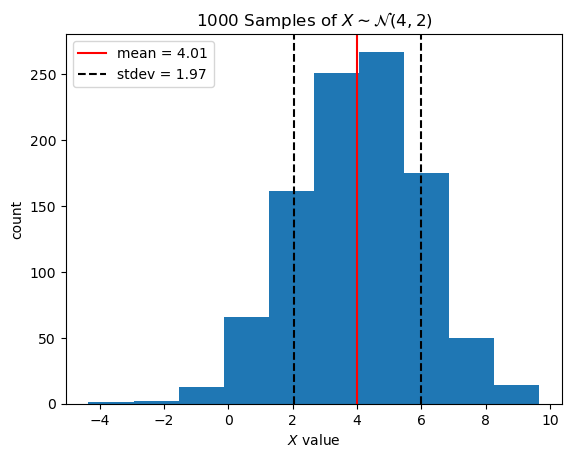

In [311]:
plt.hist(sample)
plt.axvline(mean, c='r', label=f'mean = {mean:.2f}')
plt.axvline(mean+std, c='k', ls='--', label=f'stdev = {std:.2f}')
plt.axvline(mean-std, c='k', ls='--')
plt.title(f'{N} Samples of $X \sim \mathcal{{N}}(4, 2)$')
plt.ylabel('count')
plt.xlabel("$X$ value")
plt.legend();

In [312]:
grader.check("q3.8")

q3.8 results: All test cases passed!

**This concludes HW0. Thank you!**